# Problem Statement

1. On the assumption that $\rho{_j}$ = 0 for *j* > 2, obtain the following :
    - Approximate standard errors for *r${_1}$*, *r${_2}$*, and *r${_j}$*, *j* > 2.
    - The approximate correlation between *r${_3}$* and *r${_5}$*.

2. My interpretation : 
    - Problem is primarily dealing w/ section 2.1.6. When given a TS, we want to check if $\rho{_k}$ = 0 beyond a certain lag (distance apart). *q* is the point at which k is 0/tend to 0.
    - At what point (lag k) is there no relationship between our AutoCors?
---
# Questions/Futher Explore

- Should we account for the assumption or it's already taken care of bc P32 "For any process for which all the autocorrelations $\rho{_v}$ are zero for v > q, all terms except the first appearing in the right-hand side of (2.1.13)

# TODO

- [x] Load Data

- [x] (2.1.12) **Estimate the ACov @ lag k :** $ \hat{\gamma}_{k} $ (gamma hat) = 1/N * $ \sum_{t=1}^{N - k} (z_{t} - \bar{z})(z_{t+k} - \bar{z}) $ k = 0, 1, 2,..., K

- [x] (2.1.12) Set : $ c_k $ = $ \hat{\gamma}_{k} $

- [x] (2.1.11) **Estimate the ACor @ lag k :** $ \hat{\rho}{_k} $ (rho hat) = $ c_k $ / $ c_0 $

- [x] (2.1.11) Set : $ r_k $ to  $ \hat{\rho}{_k} $

- [ ] (2.1.15) **Approximate the Variance of the Estimated ACor Coefficient @ lag k :** var[$ r_{k} $] $ \simeq $ 1/N (1 + 2 * $ \sum_{v=1}^{q} \rho^{2}_{v}$) k > q

---

---

In [1]:
import numpy as np

## Load Data

In [2]:
z = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 
        202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 
        207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]

In [3]:
N = len(z)
ks = range(0, N)
zbar = np.mean(z)
N, ks, zbar

(39, range(0, 39), 203.02564102564102)

## Estimate AutoCov @ lag k

- is the **spread at lag k ($\hat{\gamma}_{k}$)** of two variables - joint distributions
    - $ \hat{\gamma}_{k} $ (gamma hat) = 1/N * $ \sum_{t=1}^{N - k} (z_{t} - \bar{z})(z_{t+k} - \bar{z}) $ k = 0, 1, 2,..., K
    - ***Think :*** 
        - We want to find the estimated **confidence** in our single variable (z) at two different times t and t + k
            - Estimated bc we may ! be able to draw an exact value to due the complexity (of data, time it'll take, computations, etc)
            - If large, then high variance which results in a wide distribution but if small, then low variance and a narrow distribution
            - (?) Can I have a (-) confidence? If so, does this means that I'm ! confident at all?
                - Yes, can have a (-) Est AutoCov which implies that the value falls to the left of 0 when looking at the distribution curve.
       
        - Why (importance) : 
            - Gather insights (ie : spread or confidence) on the same variable but at different times t and t + k
            - Approx bc we may ! be able to get the true value

In [4]:
def est_autocov(data, lag_k, sample_mean): 
    """
    Calculate the estimated autocovariance
    
    :param data: numerical values in data
    :param lag_k: a list of k values
    :param sample_mean: mean of the data
    :return: a list of tuples (ck idex, ck float value)
    
    """
    
    gamma_k = 0
    
    N = len(data)

    for t in range(N - lag_k):

        gamma_k += (data[t] - sample_mean) * (data[t + lag_k] - sample_mean)
 
    return lag_k, gamma_k/N

In [5]:
c_ks = []

for i in range(len(ks)): 
    
    c_ks.append(est_autocov(z, ks[i], zbar))
    
c_ks

[(0, 10.742932281393824),
 (1, 5.021021932264538),
 (2, 1.2787302550616158),
 (3, -1.4589591867698377),
 (4, -2.560225222947118),
 (5, -2.816652337362398),
 (6, -5.050068274920344),
 (7, -3.97250459380637),
 (8, -1.6405030428699072),
 (9, 1.5895918676983765),
 (10, 3.9459195198840167),
 (11, 3.0195384278224506),
 (12, 1.4541040813230157),
 (13, 0.0701293008985326),
 (14, -0.7234444275864385),
 (15, -0.5459464926920534),
 (16, -3.1376793270284375),
 (17, -2.1620222862826406),
 (18, -1.105497395438223),
 (19, 0.9464252600347279),
 (20, 2.232404457256528),
 (21, 1.1304809588833256),
 (22, 1.469057131779024),
 (23, 1.316509044319694),
 (24, 1.0324685176756176),
 (25, -0.8156745730710235),
 (26, -2.0195047118124054),
 (27, -1.5829666717240694),
 (28, -1.0714779413004272),
 (29, -0.3311923666953255),
 (30, 0.12769938805441775),
 (31, -0.07810313727473475),
 (32, 0.4333855931489071),
 (33, 0.6391544024680124),
 (34, 0.5595846187562171),
 (35, 0.12367032485375742),
 (36, -0.7724675061953165),


## Estimate AutoCor @ lag k

- is the measure of the **relationship** between the same variable but at different times (t and t + k)
    - notation 
    - **Think :** 
        - We want to find the **similarity** of the same variable but at different times (t and t + k)
        - Why (importance) : 
            - To determine if data is random. Where do t and t + k stop correlating? That's when $ \exists $ no relationship/ no significance so can disregard
            - To determine the trend. If $ \exists $, then highly correlated. The autocov is significantly ! 0 but may decline towards 0. Series may said to be non-stationary


In [6]:
def est_autocor(data, lag_k, sample_mean):
    c_k = est_autocov(data, lag_k, sample_mean)
    # print("\nc_k : ", c_k[1])
    cnot = est_autocov(data, 0, sample_mean)
    # print("cnot : ", cnot[1])
    # print(c_k[1], cnot[1])
    rho_hat_k = np.divide(c_k[1], cnot[1])
    # print("rho_hat_k : ", rho_hat_k)
    return lag_k, rho_hat_k

In [24]:
r_ks = []

for k in range(len(ks)):
    # print("k : ", k)
    r_ks.append(est_autocor(z, k, zbar))
r_ks

[(0, 1.0),
 (1, 0.4673790917364969),
 (2, 0.11902990929918708),
 (3, -0.13580642124093772),
 (4, -0.2383171703857139),
 (5, -0.2621865486614569),
 (6, -0.47008285472177724),
 (7, -0.3697784263879735),
 (8, -0.15270533220349622),
 (9, 0.14796629319273133),
 (10, 0.36730376926215347),
 (11, 0.2810720898848192),
 (12, 0.135354486394878),
 (13, 0.006527947776417874),
 (14, -0.06734143049932512),
 (15, -0.05081913190848305),
 (16, -0.2920691711389383),
 (17, -0.20125066691774143),
 (18, -0.10290462291686271),
 (19, 0.08809747983554594),
 (20, 0.20780215296739155),
 (21, 0.1052302043122116),
 (22, 0.13674638295201313),
 (23, 0.12254652732008899),
 (24, 0.09610676960738151),
 (25, -0.07592662335624396),
 (26, -0.18798449612403106),
 (27, -0.14734959043404583),
 (28, -0.09973794055801402),
 (29, -0.03082886106141921),
 (30, 0.011886827982299224),
 (31, -0.007270187992342198),
 (32, 0.04034146188368957),
 (33, 0.05949533942190003),
 (34, 0.052088629444810644),
 (35, 0.011511784828798347),
 (36,

# Graph AutoCor
- also known as correlogram
- xcorr : Plot the cross correlation between x and y; returns the lag vector
    - A measure of not only the strength of a relation between to stochastic process but also its direction *[Book : TSA by Henrik Madsen | P 107]*
        - How does this differ from a histogram?
    - Not symmetric
    - Also known as cross correlogram
- acorr : Plot the autocorrelation of x; returns the lag vector
    - Comparison of t = 0 and t + k so it follows as t = 0 and t + k = 0, t = 0 and t + k = 1, t = 0 and t + k = K, 
        - Why t = 0 every time? Bc $r{_k}$ = $\hat{\rho}{_k}$ = $c_k$ / $c{_0}$, where k in $c_k$ updates and k in $c{_k}{_=}{_0}$ which implies the first t
- The autocorrelation function is characterized by correlations that alternate in sign and tend to damp out with increasing lag [P 31]
- [ ] Draw line of significance

In [9]:
import matplotlib.pyplot as plt

In [10]:
class Plots: 
        
    def line_plot(self, x, y):
        fig, ax = plt.subplots()
        ax.plot(x, y, linewidth=3.0)
        
    def autocor_plot(self, x, y):
        fig, [ax1, ax2] = plt.subplots(2, 1)
        ax1.xcorr(x, y, maxlags=ks[-1], usevlines = True, normed = True, lw=2)
        ax1.grid(True)

        # ks x-axis; pho_k = -pho_k
        ax2.acorr(y, maxlags=ks[-1], usevlines = True, normed = True, lw=2)
        ax2.grid(True)

        # plt.title("Autocorrelation")
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelation')

In [11]:
def graph_est_autocor(x, y, len_rks):
    
    for idx in range(len_rks):
        x.append(r_ks[idx][0])
        # print("x : ", x)
        y.append(r_ks[idx][1])
        # print("y : ", y, "\n")
    plots = Plots()
    plots.line_plot(x, y)
    plots.autocor_plot(x, y)

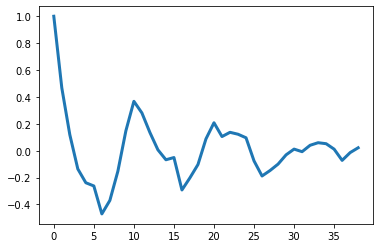

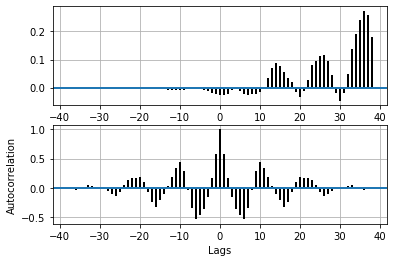

In [12]:
lags = []
autocor = []
len_rks = len(r_ks)
graph_est_autocor(lags, autocor, len_rks)

# SE

In [73]:
rks = []

for idx in range(len_rks):
    # print("x : ", x)
    rks.append(r_ks[idx][1])
    
print(rks)

[1.0, 0.4673790917364969, 0.11902990929918708, -0.13580642124093772, -0.2383171703857139, -0.2621865486614569, -0.47008285472177724, -0.3697784263879735, -0.15270533220349622, 0.14796629319273133, 0.36730376926215347, 0.2810720898848192, 0.135354486394878, 0.006527947776417874, -0.06734143049932512, -0.05081913190848305, -0.2920691711389383, -0.20125066691774143, -0.10290462291686271, 0.08809747983554594, 0.20780215296739155, 0.1052302043122116, 0.13674638295201313, 0.12254652732008899, 0.09610676960738151, -0.07592662335624396, -0.18798449612403106, -0.14734959043404583, -0.09973794055801402, -0.03082886106141921, 0.011886827982299224, -0.007270187992342198, 0.04034146188368957, 0.05949533942190003, 0.052088629444810644, 0.011511784828798347, -0.07190471706995569, -0.01407274895646992, 0.02184979443241371]


In [142]:
def died_out_rks(q, new_rks):
    
    for k in range(len(ks)): 
        # print(k)
        if k >= q:        
            new_rks.append(rks[k])
            print(k, new_rks)
        # else:
        #     print(False) 
    return new_rks

In [146]:
# q = np.random.randint(len(ks))
# print(q)
q = 37
qs = []
new_r_ks = died_out_rks(q, qs)
new_r_ks

37 [-0.01407274895646992]
38 [-0.01407274895646992, 0.02184979443241371]


[-0.01407274895646992, 0.02184979443241371]

In [147]:
# approx_var_r_sub_k

for v in range(1, len(qs)):
    # which to calc?
    print(v, new_r_ks[v], rks[v])
    # print("Variance of the estimated autocorrelation values are : ") 
    approx_var_r_sub_k = 1/N * (1 + 2 * (np.square(rks[v])))
    print(v, approx_var_r_sub_k)
    # approx_var_r_sub_k[

1 0.02184979443241371 0.4673790917364969
1 0.03684324181499655
